In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
consumerKey #Confidential
consumerSecret #Confidential
accessToken  #Confidential
accessTokenSecret #Confidential

In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [4]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="ArvindKejriwal", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) बुराड़ी में दिल्ली सरकार का 700 बेड का नया वर्ल्ड क्लास अस्पताल बन रहा है। करोना के इलाज के लिए हम 450 बेड्स अभी शुरू कर रहे हैं। इसका जायज़ा लेने आज मैं और मनीष जी गए थे। https://t.co/4yvnI1fAq0

2) Delhi will fight Corona together. I appeal to all NGOs and individuals to join in this effort on a large scale. https://t.co/u7675fYKGH

3) अब दिल्ली वसियों को टेस्ट कराने में कोई परेशानी नहीं होगी। आने वाले दिनों में इस से भी बहुत ज़्यादा टेस्टिंग की जाएगी। https://t.co/91fIRPhqXm

4) RT @AnkushNarang_: Earlier in a Day received a Whatsapp message from a Lok Nayak (LNJP) hospital Patient’s husband 
A Pregnant Subject who…

5) Inspected Delhi govt's upcoming 10,000 bed Covid Care Centre at the Radha Soami Satsang Beas grounds at Chhatarpur. A small section of the beds will also have oxygen support. 

#DelhiFightsCorona https://t.co/htSW9uEQSi



In [5]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,बुराड़ी में दिल्ली सरकार का 700 बेड का नया वर्...
1,Delhi will fight Corona together. I appeal to ...
2,अब दिल्ली वसियों को टेस्ट कराने में कोई परेशान...
3,RT @AnkushNarang_: Earlier in a Day received a...
4,"Inspected Delhi govt's upcoming 10,000 bed Cov..."


In [6]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,बुराड़ी में दिल्ली सरकार का 700 बेड का नया वर्...
1,Delhi will fight Corona together. I appeal to ...
2,अब दिल्ली वसियों को टेस्ट कराने में कोई परेशान...
3,_: Earlier in a Day received a Whatsapp messag...
4,"Inspected Delhi govt's upcoming 10,000 bed Cov..."
...,...
95,": Shri. Ji, Thank you for your good wishes."
96,Wish Kerala CM Shri Pinarayi Vijayan ji a happ...
97,हमारे राज्य सभा सांसद संजय सिंह जी और उनकी धर्...
98,Heartfelt condolences to Dr Pande's family. He...


In [7]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,बुराड़ी में दिल्ली सरकार का 700 बेड का नया वर्...,0.000000,0.000000
1,Delhi will fight Corona together. I appeal to ...,0.428571,0.214286
2,अब दिल्ली वसियों को टेस्ट कराने में कोई परेशान...,0.000000,0.000000
3,_: Earlier in a Day received a Whatsapp messag...,0.444444,0.055556
4,"Inspected Delhi govt's upcoming 10,000 bed Cov...",0.400000,-0.250000
...,...,...,...
95,": Shri. Ji, Thank you for your good wishes.",0.600000,0.700000
96,Wish Kerala CM Shri Pinarayi Vijayan ji a happ...,0.633333,0.416667
97,हमारे राज्य सभा सांसद संजय सिंह जी और उनकी धर्...,0.000000,0.000000
98,Heartfelt condolences to Dr Pande's family. He...,0.693750,-0.168750


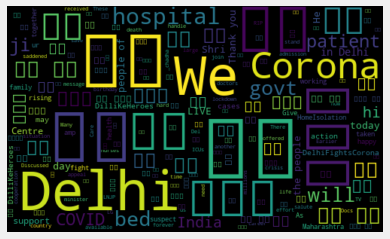

In [8]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,बुराड़ी में दिल्ली सरकार का 700 बेड का नया वर्...,0.000000,0.000000,Neutral
1,Delhi will fight Corona together. I appeal to ...,0.428571,0.214286,Positive
2,अब दिल्ली वसियों को टेस्ट कराने में कोई परेशान...,0.000000,0.000000,Neutral
3,_: Earlier in a Day received a Whatsapp messag...,0.444444,0.055556,Positive
4,"Inspected Delhi govt's upcoming 10,000 bed Cov...",0.400000,-0.250000,Negative
...,...,...,...,...
95,": Shri. Ji, Thank you for your good wishes.",0.600000,0.700000,Positive
96,Wish Kerala CM Shri Pinarayi Vijayan ji a happ...,0.633333,0.416667,Positive
97,हमारे राज्य सभा सांसद संजय सिंह जी और उनकी धर्...,0.000000,0.000000,Neutral
98,Heartfelt condolences to Dr Pande's family. He...,0.693750,-0.168750,Negative


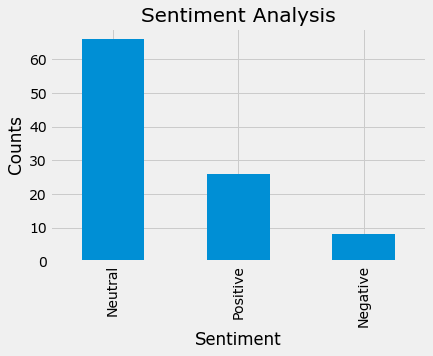

In [10]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()